In [3]:
import numpy as np 
import pandas as pd

day0_csv = pd.read_csv("/Users/jonathanlim/Desktop/Code_2022/IMC_Trading/IMC-Trading-Competition-1/Round1/Data/trades_round_1_day_0_nn.csv",delimiter=';')

In [19]:
day0_csv

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,NaN,NaN,PEARLS,SEASHELLS,10002.0,1
1,300,NaN,NaN,PEARLS,SEASHELLS,9998.0,2
2,300,NaN,NaN,PEARLS,SEASHELLS,9998.0,1
3,400,NaN,NaN,BANANAS,SEASHELLS,4899.0,9
4,500,NaN,NaN,BANANAS,SEASHELLS,4899.0,1
...,...,...,...,...,...,...,...
5162,998800,NaN,NaN,PEARLS,SEASHELLS,10002.0,1
5163,998800,NaN,NaN,BANANAS,SEASHELLS,4870.0,1
5164,999300,NaN,NaN,BANANAS,SEASHELLS,4875.0,17
5165,999500,NaN,NaN,BANANAS,SEASHELLS,4869.0,2


TypeError: show() got an unexpected keyword argument 'figsize'

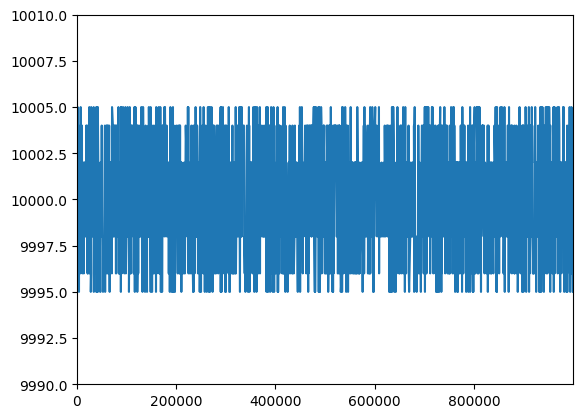

In [30]:
import matplotlib.pyplot as plt

pearls = day0_csv[day0_csv['symbol'] == 'PEARLS']
x = pearls['timestamp'].tolist()
y = pearls['price'].tolist()

plt.xlim([0, 999500])
plt.ylim([9990, 10010])

plt.plot(x,y)
plt.show(figsize=()) 

https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827

In [88]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

# stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')
stock_data = day0_csv[day0_csv['symbol']=='BANANAS']
stock_data.head()



,timestamp,buyer,seller,symbol,currency,price,quantity
3,400,NaN,NaN,BANANAS,SEASHELLS,4899.0,9
4,500,NaN,NaN,BANANAS,SEASHELLS,4899.0,1
7,1400,NaN,NaN,BANANAS,SEASHELLS,4891.0,1
8,1500,NaN,NaN,BANANAS,SEASHELLS,4896.0,1
11,2200,NaN,NaN,BANANAS,SEASHELLS,4896.0,16


Text(0, 0.5, 'Prices ($)')

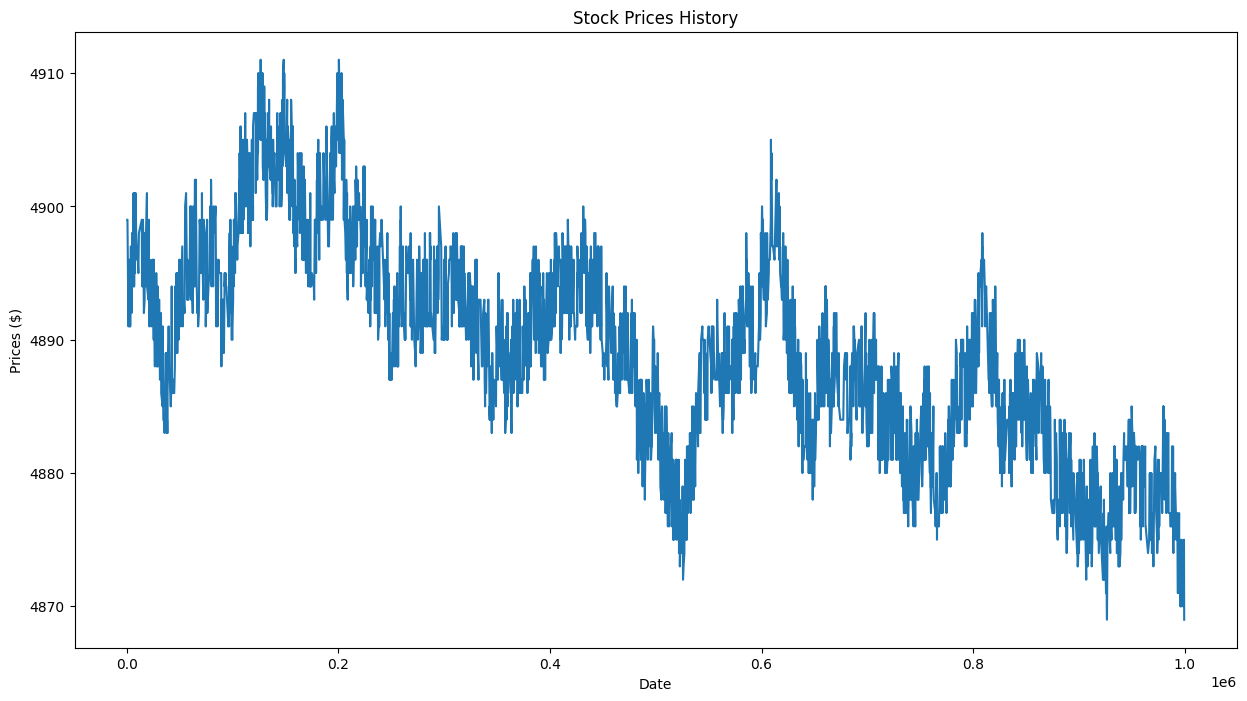

In [89]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
# plt.xlim([0, 999500])
# plt.ylim([9993, 10006])


x = stock_data['timestamp'].tolist()
y = stock_data['price'].tolist()

plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Prices ($)')

## Preparation of training set

In [97]:
close_prices = stock_data['price']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train_60 = []
y_train_60 = []
x_train_120 = []
y_train_120 = []

for i in range(60, len(train_data)):
    x_train_60.append(train_data[i-60:i, 0])
    y_train_60.append(train_data[i, 0])
    
for i in range(120, len(train_data)):
    x_train_120.append(train_data[i-120:i, 0])
    y_train_120.append(train_data[i, 0])
    
x_train_60, y_train_60 = np.array(x_train_60), np.array(y_train_60)
x_train_60 = np.reshape(x_train_60, (x_train_60.shape[0], x_train_60.shape[1], 1))

x_train_120, y_train_120 = np.array(x_train_120), np.array(x_train_120)
x_train_120 = np.reshape(x_train_120, (x_train_120.shape[0], x_train_120.shape[1], 1))

## Preparation of test Set

In [98]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Setting up LSTM Network Architecture

In [99]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_60.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()


model2 = keras.Sequential()
model2.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_120.shape[1], 1)))
model2.add(layers.LSTM(100, return_sequences=False))
model2.add(layers.Dense(25))
model2.add(layers.Dense(1))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)            

In [100]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_60, y_train_60, batch_size= 1, epochs=3)

Epoch 1/3
2151/2151 [==============================] - 57s 24ms/step - loss: 0.0080
Epoch 2/3
2151/2151 [==============================] - 63s 29ms/step - loss: 0.0065
Epoch 3/3
2151/2151 [==============================] - 51s 24ms/step - loss: 0.0062


In [102]:
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(x_train_120, y_train_120, batch_size= 1, epochs=3)

Epoch 1/3
2091/2091 [==============================] - 86s 39ms/step - loss: 0.0156
Epoch 2/3
2091/2091 [==============================] - 79s 38ms/step - loss: 0.0140
Epoch 3/3
2091/2091 [==============================] - 91s 43ms/step - loss: 0.0114


## Model Evaluation

In [101]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

predictions = model2.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

18/18 [==============================] - 1s 19ms/step


ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 120, 1), found shape=(None, 60, 1)


Visualising the Predicted Price

/var/folders/0g/mml2lfgj70x82srpbgxfwwsc0000gn/T/ipykernel_4901/1685049404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


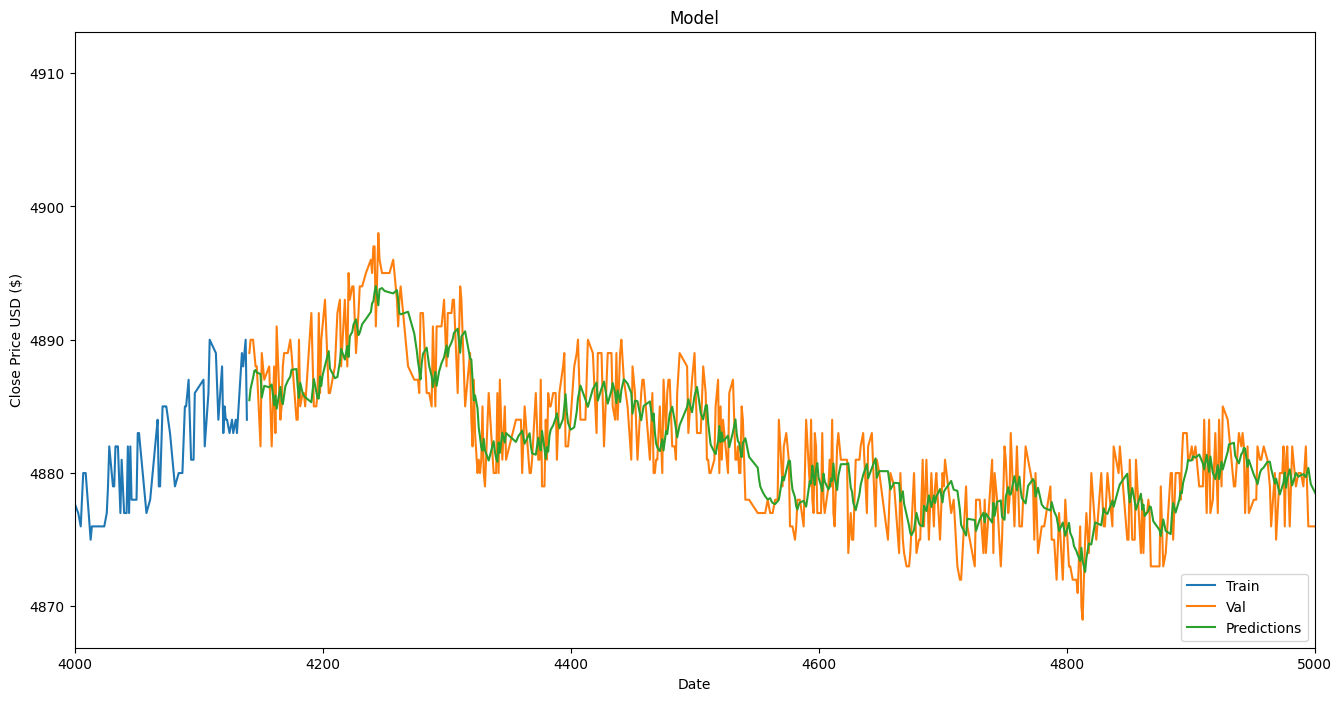

In [25]:
data = stock_data.filter(['price'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))


plt.xlim([4000, 5000])



plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

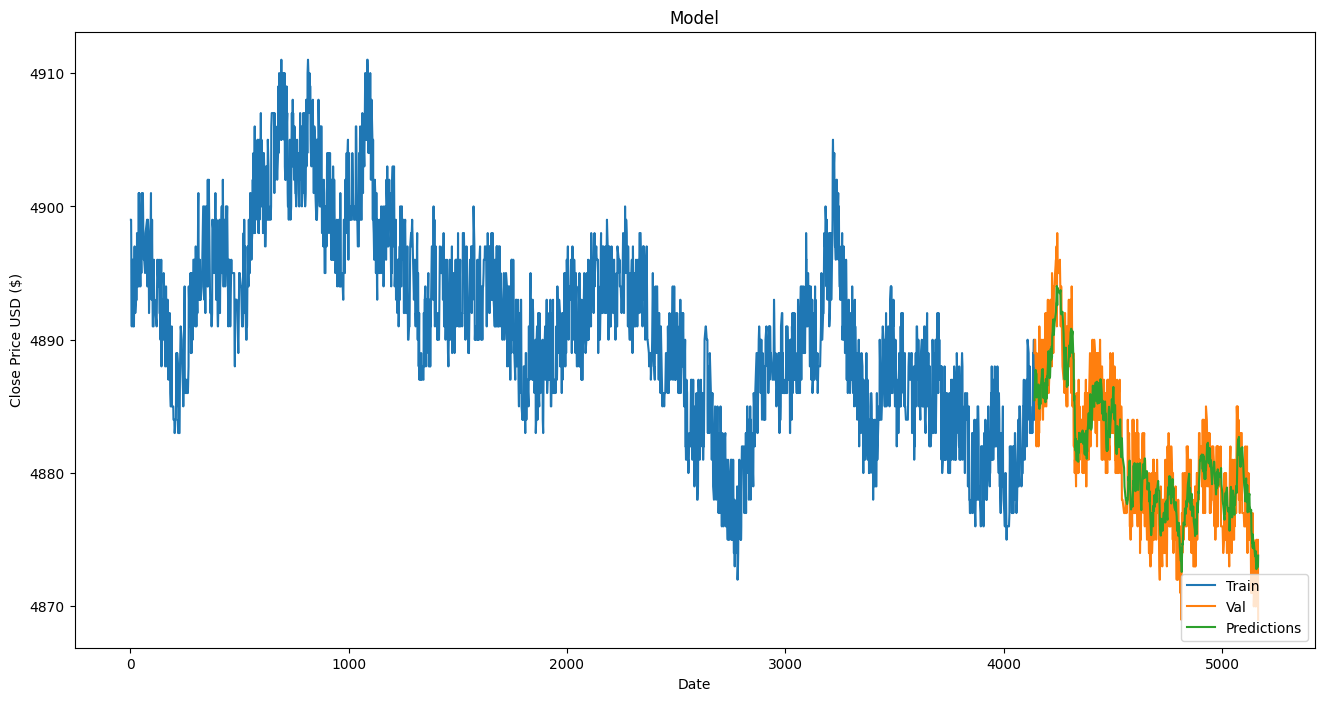

In [26]:
plt.figure(figsize=(16,8))



# plt.xlim([4000, 5000])



plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Test on the different data set

In [74]:
test2_csv = pd.read_csv("/Users/jonathanlim/Desktop/Code_2022/IMC_Trading/IMC-Trading-Competition-1/Round1/Data/trades_round_1_day_-1_nn.csv",delimiter=";")

In [75]:
test2_csv

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,PEARLS,SEASHELLS,10004.0,1
1,0,NaN,NaN,BANANAS,SEASHELLS,4952.0,1
2,1100,NaN,NaN,PEARLS,SEASHELLS,9996.0,2
3,1300,NaN,NaN,BANANAS,SEASHELLS,4949.0,3
4,1700,NaN,NaN,PEARLS,SEASHELLS,10002.0,1
...,...,...,...,...,...,...,...
5274,997600,NaN,NaN,PEARLS,SEASHELLS,10004.0,2
5275,998900,NaN,NaN,BANANAS,SEASHELLS,4897.0,1
5276,999200,NaN,NaN,BANANAS,SEASHELLS,4896.0,1
5277,999600,NaN,NaN,PEARLS,SEASHELLS,9998.0,1


In [85]:
test2_csv = test2_csv[test2_csv['symbol'] == 'BANANAS']
close_prices = test2_csv['price']
values = close_prices.values
# training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
# scaled_data = scaled_data[len(scaled_data)-60: , : ]

x_test = []

for i in range(60, len(scaled_data)):
    x_test.append(scaled_data[i-60:i, 0])


In [87]:
scaled_data[10: , :]

array([[0.04166667],
       [0.08333333],
       [0.125     ],
       [0.09722222],
       [0.01388889],
       [0.        ],
       [0.09722222],
       [0.01388889],
       [0.09722222],
       [0.08333333],
       [0.01388889],
       [0.01388889],
       [0.        ],
       [0.08333333],
       [0.01388889],
       [0.        ],
       [0.02777778],
       [0.125     ],
       [0.04166667],
       [0.125     ],
       [0.02777778],
       [0.09722222],
       [0.02777778],
       [0.04166667],
       [0.02777778],
       [0.11111111],
       [0.04166667],
       [0.125     ],
       [0.06944444],
       [0.06944444],
       [0.08333333],
       [0.15277778],
       [0.05555556],
       [0.06944444],
       [0.09722222],
       [0.06944444],
       [0.06944444],
       [0.06944444],
       [0.09722222],
       [0.09722222],
       [0.13888889],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.11111111],
       [0.05555556],
       [0.152

In [73]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

NameError: name 'x_testa' is not defined